In [20]:
import matplotlib.pyplot as plt
import numpy 
import pdb
import math

mi = 0.018 # m2's. per bjpj, 7-Mar-2018.   Had been 0.05
mH = 10.0E3
Eres = mH**2/(2*mi)
hbarc = 197 * 1E6 * 1E-15 *100 # eV-cm
R = 150E6*1E3*100 # earth-sun distance in cm

# http://pdg.lbl.gov/2008/reviews/rpp2008-rev-solar-neutrinos.pdf
phi_pp = 5.99E10 # 1/cm^2.sec +/1%
phi_Be7 = 4.84E9 # 1/cm^2.sec +/10%
Enupp = 0.3E6 # very close to mean of pp flux . Use this rather than properly integrating over dE.
EnuBe7 = 0.86E6

In [21]:


def eqn9(g,E):
    g = 0.18*g  # bjpj, 7-Mar-2018
    Im = g**4 * E/(4*mi**2) * ( Eres/((E-Eres)**2 + (0.5*Eres*g**2)**2) + Eres/((E+Eres)**2 + (0.5*Eres*g**2)**2) ) 
    # see the solar-calc.tex write-up for this next eqn.
    xsec = Im * 2*mi/E * hbarc**2
    return xsec  # cm^2



In [22]:
x=eqn9(1E-4,0.8E6)
print x
x=eqn9(1E-5,0.8E6)
print x
x=eqn9(1E-7,0.8E6)
print x

n=1.0E10*300 
g=0.000001
# rate of reactions in whole sphere centered on sun out to earth = \Int dr.4pir^2 {xsec * N_targets * flux(r)} 
r = n*4*math.pi*R**3 * (0.86*eqn9(g,Enupp)*phi_pp  +  0.14*eqn9(g,EnuBe7)*phi_Be7) # 1/sec
# The rate that is eaten up that would otherwise get to earth is r * 4pi r_e^2 / 4piR^2
# So, the net flux eaten up at earth by our CNB is r/(4pi r_e^2) = r/4piR^2
phi_miss = r/(4*math.pi*R**2)

print phi_miss
# We need phi_miss to be not more than 1.1% of phi_pp+phi_Be7


8.14802919549e-37
8.14802919549e-41
8.14802919549e-49
1.91366365957e-08


In [23]:
ny = numpy.logspace(8, 29, 400)
gx = numpy.logspace(-8,0,200)
phi_eaten = numpy.empty((gx.size,ny.size))
print phi_eaten.shape
for i in range(gx.size):   
    for j in range(ny.size):
        # 55 /cm^2 for m2's
        phi_eaten[i,j] = ny[j]*55*R * (0.86*eqn9(gx[i],Enupp)*phi_pp  +  0.14*eqn9(gx[i],EnuBe7)*phi_Be7) 
        #pdb.set_trace()
        #print  str(i) + " " + str(j) + " " +str(phi_eaten[i,j])
print phi_eaten.shape

(200, 400)
(200, 400)


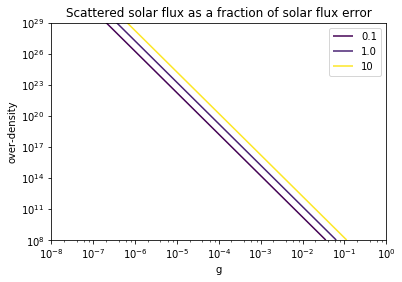

In [24]:
gridX, gridY = numpy.meshgrid(gx, ny)
Cols = ['DarkRed','DarkBlue']
CS = plt.contour(gridX,gridY,phi_eaten.T/(0.011*(0.86*phi_pp+0.14*phi_Be7)),levels=[0.1,1.0,10.0] )
plt.loglog()
plt.xlabel('g')
plt.ylabel('over-density')
plt.title('Scattered solar flux as a fraction of solar flux error')
labels = ['0.1', '1.0','10']
for i in range(len(labels)):
    CS.collections[i].set_label(labels[i])
plt.legend(loc='upper right')
plt.savefig('solar-constraint.png')
plt.show()
plt.close()

In [ ]:
hbarc

In [ ]:
#phi_eaten/(0.011*(phi_pp+phi_Be7))


In [ ]:
gridX.shape


In [ ]:
phi_eaten.shape


In [ ]:
phi_eaten[0:12,20
         ]

In [ ]:
gx[0:40
  ]


In [ ]:
eqn9(gx[0:40
       ],Enupp)

In [ ]:
eqn9(0.001,Enupp)*300*1e16*R